# Churn

## Importando os dados

In [189]:
import pandas as pd

dados = pd.read_json('https://caelum-online-public.s3.amazonaws.com/2929-pandas/dataset-telecon.json')
dados.head()

,id_cliente,Churn,cliente,telefone,internet,conta
0,0002-ORFBO,nao,"{'genero': 'feminino', 'idoso': 0, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': None, 'faturamente_eletronico': N..."
1,0003-MKNFE,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': 'mes a mes', 'faturamente_eletron..."
2,0004-TLHLJ,sim,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
3,0011-IGKFF,sim,"{'genero': 'masculino', 'idoso': 1, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
4,0013-EXCHZ,sim,"{'genero': 'feminino', 'idoso': 1, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."


In [190]:
pd.json_normalize(dados['conta']).head()

,contrato,faturamente_eletronico,metodo_pagamento,cobranca.mensal,cobranca.Total
0,None,None,None,NaN,None
1,mes a mes,nao,cheque pelo correio,59.9,542.4
2,mes a mes,sim,cheque eletronico,73.9,280.85
3,mes a mes,sim,cheque eletronico,98.0,1237.85
4,mes a mes,sim,cheque pelo correio,83.9,267.4


In [191]:
pd.json_normalize(dados['telefone']).head()

,servico_telefone,varias_linhas
0,sim,nao
1,sim,sim
2,sim,nao
3,sim,nao
4,sim,nao


In [192]:
import json

with open("dataset-telecon.json") as f:
    json_bruto = json.load(f)

In [193]:
json_bruto

[{'id_cliente': '0002-ORFBO',
  'Churn': 'nao',
  'cliente': {'genero': 'feminino',
   'idoso': 0,
   'parceiro': 'sim',
   'dependentes': 'sim',
   'tempo_servico': 9},
  'telefone': {'servico_telefone': 'sim', 'varias_linhas': 'nao'},
  'internet': {'servico_internet': 'DSL',
   'seguranca_online': 'nao',
   'backup_online': 'sim',
   'protecao_dispositivo': 'nao',
   'suporte_tecnico': 'sim',
   'tv_streaming': 'sim',
   'filmes_streaming': 'nao'},
  'conta': {'contrato': None,
   'faturamente_eletronico': None,
   'metodo_pagamento': None,
   'cobranca': {'mensal': None, 'Total': None}}},
 {'id_cliente': '0003-MKNFE',
  'Churn': 'nao',
  'cliente': {'genero': 'masculino',
   'idoso': 0,
   'parceiro': 'nao',
   'dependentes': 'nao',
   'tempo_servico': 9},
  'telefone': {'servico_telefone': 'sim', 'varias_linhas': 'sim'},
  'internet': {'servico_internet': 'DSL',
   'seguranca_online': 'nao',
   'backup_online': 'nao',
   'protecao_dispositivo': 'nao',
   'suporte_tecnico': 'nao',


In [194]:
dados_normalizados = pd.json_normalize(json_bruto,sep='_')
dados_normalizados.head()

,id_cliente,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.4


In [195]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente_genero                 7344 non-null   object 
 3   cliente_idoso                  7344 non-null   int64  
 4   cliente_parceiro               7344 non-null   object 
 5   cliente_dependentes            7344 non-null   object 
 6   cliente_tempo_servico          7336 non-null   float64
 7   telefone_servico_telefone      7344 non-null   object 
 8   telefone_varias_linhas         7344 non-null   object 
 9   internet_servico_internet      7344 non-null   object 
 10  internet_seguranca_online      7344 non-null   object 
 11  internet_backup_online         7344 non-null   object 
 12  internet_protecao_dispositivo  7344 non-null   o

## Limpeza de dados

In [198]:
dados_normalizados['conta_cobranca_Total'] = dados_normalizados['conta_cobranca_Total'].astype('Float64')

ValueError: could not convert string to float: ' '

In [199]:
dados_normalizados[dados_normalizados['conta_cobranca_Total'] == ' ']

,id_cliente,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
975,1371-DWPAZ,nao,feminino,0,sim,sim,0.0,nao,sem servico de telefone,DSL,...,sim,sim,sim,sim,nao,dois anos,nao,cartao de credito (automatico),56.05,
1775,2520-SGTTA,nao,feminino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.00,
1955,2775-SEFEE,nao,masculino,0,nao,sim,0.0,sim,sim,DSL,...,sim,nao,sim,nao,nao,dois anos,sim,transferencia bancaria (automatica),61.90,
2075,2923-ARZLG,nao,masculino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,sim,cheque pelo correio,19.70,
2232,3115-CZMZD,nao,masculino,0,nao,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.25,
2308,3213-VVOLG,nao,masculino,0,sim,sim,0.0,sim,sim,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,25.35,
2930,4075-WKNIU,nao,feminino,0,sim,sim,0.0,sim,sim,DSL,...,sim,sim,sim,sim,nao,dois anos,nao,cheque pelo correio,73.35,
3134,4367-NUYAO,nao,masculino,0,sim,sim,0.0,sim,sim,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,25.75,
3203,4472-LVYGI,nao,feminino,0,sim,sim,0.0,nao,sem servico de telefone,DSL,...,nao,sim,sim,sim,nao,dois anos,sim,transferencia bancaria (automatica),52.55,
4169,5709-LVOEQ,nao,feminino,0,sim,sim,0.0,sim,nao,DSL,...,sim,sim,nao,sim,sim,dois anos,nao,cheque pelo correio,80.85,


In [200]:
dados_normalizados[(dados_normalizados['conta_cobranca_Total']== ' ') ][
    ['cliente_tempo_servico','conta_contrato', 'conta_cobranca_mensal','conta_cobranca_Total']
]

,cliente_tempo_servico,conta_contrato,conta_cobranca_mensal,conta_cobranca_Total
975,0.0,dois anos,56.05,
1775,0.0,dois anos,20.00,
1955,0.0,dois anos,61.90,
2075,0.0,um ano,19.70,
2232,0.0,dois anos,20.25,
2308,0.0,dois anos,25.35,
2930,0.0,dois anos,73.35,
3134,0.0,dois anos,25.75,
3203,0.0,dois anos,52.55,
4169,0.0,dois anos,80.85,


In [201]:
dados_normalizados[(dados_normalizados['conta_cobranca_Total']== ' ')  & (dados_normalizados['conta_contrato']== 'dois anos')][
    ['cliente_tempo_servico','conta_contrato', 'conta_cobranca_mensal','conta_cobranca_Total']
]

,cliente_tempo_servico,conta_contrato,conta_cobranca_mensal,conta_cobranca_Total
975,0.0,dois anos,56.05,
1775,0.0,dois anos,20.00,
1955,0.0,dois anos,61.90,
2232,0.0,dois anos,20.25,
2308,0.0,dois anos,25.35,
2930,0.0,dois anos,73.35,
3134,0.0,dois anos,25.75,
3203,0.0,dois anos,52.55,
4169,0.0,dois anos,80.85,
5599,0.0,dois anos,19.85,


In [204]:
idx_dois_anos = dados_normalizados[(dados_normalizados['conta_cobranca_Total']== ' ')  & (dados_normalizados['conta_contrato']== 'dois anos')].index
idx_um_ano = dados_normalizados[(dados_normalizados['conta_cobranca_Total']== ' ')  & (dados_normalizados['conta_contrato']== 'um ano')].index

In [205]:
dados_normalizados.loc[idx_dois_anos, "conta_cobranca_Total"] = dados_normalizados.loc[idx_dois_anos, "conta_cobranca_mensal"] * 24
dados_normalizados.loc[idx_um_ano, "conta_cobranca_Total"] = dados_normalizados.loc[idx_um_ano, "conta_cobranca_mensal"] * 12

In [206]:
dados_normalizados.loc[idx_dois_anos, "cliente_tempo_servico"] = 24
dados_normalizados.loc[idx_um_ano, "cliente_tempo_servico"] = 12

In [207]:
dados_normalizados[(dados_normalizados['conta_cobranca_Total']== ' ') ][
    ['cliente_tempo_servico','conta_contrato', 'conta_cobranca_mensal','conta_cobranca_Total']
]

,cliente_tempo_servico,conta_contrato,conta_cobranca_mensal,conta_cobranca_Total


In [209]:
dados_normalizados.loc[idx_dois_anos][
    ['cliente_tempo_servico','conta_contrato', 'conta_cobranca_mensal','conta_cobranca_Total']
]

,cliente_tempo_servico,conta_contrato,conta_cobranca_mensal,conta_cobranca_Total
975,24.0,dois anos,56.05,1345.2
1775,24.0,dois anos,20.00,480.0
1955,24.0,dois anos,61.90,1485.6
2232,24.0,dois anos,20.25,486.0
2308,24.0,dois anos,25.35,608.4
2930,24.0,dois anos,73.35,1760.4
3134,24.0,dois anos,25.75,618.0
3203,24.0,dois anos,52.55,1261.2
4169,24.0,dois anos,80.85,1940.4
5599,24.0,dois anos,19.85,476.4


In [210]:
dados_normalizados['conta_cobranca_Total'] = dados_normalizados['conta_cobranca_Total'].astype('Float64')

In [211]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente_genero                 7344 non-null   object 
 3   cliente_idoso                  7344 non-null   int64  
 4   cliente_parceiro               7344 non-null   object 
 5   cliente_dependentes            7344 non-null   object 
 6   cliente_tempo_servico          7336 non-null   float64
 7   telefone_servico_telefone      7344 non-null   object 
 8   telefone_varias_linhas         7344 non-null   object 
 9   internet_servico_internet      7344 non-null   object 
 10  internet_seguranca_online      7344 non-null   object 
 11  internet_backup_online         7344 non-null   object 
 12  internet_protecao_dispositivo  7344 non-null   o

In [212]:
for col in dados_normalizados.columns:
    print(f'Coluna: {col}')
    print(dados_normalizados[col].unique())
    print('-'*30)

Coluna: id_cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Coluna: Churn
['nao' 'sim' '']
------------------------------
Coluna: cliente_genero
['feminino' 'masculino']
------------------------------
Coluna: cliente_idoso
[0 1]
------------------------------
Coluna: cliente_parceiro
['sim' 'nao']
------------------------------
Coluna: cliente_dependentes
['sim' 'nao']
------------------------------
Coluna: cliente_tempo_servico
[9.00e+00 4.00e+00 1.30e+01 3.00e+00 7.10e+01 6.30e+01 7.00e+00      nan
 5.40e+01 7.20e+01 5.00e+00 5.60e+01 3.40e+01 1.00e+00 4.50e+01 5.00e+01
 2.30e+01 5.50e+01 2.60e+01 6.90e+01 1.10e+01 3.70e+01 4.90e+01 6.60e+01
 6.70e+01 2.00e+01 4.30e+01 5.90e+01 1.20e+01 2.70e+01 2.00e+00 2.50e+01
 2.90e+01 1.40e+01 3.50e+01 6.40e+01 3.90e+01 4.00e+01 6.00e+00 3.00e+01
 7.00e+01 5.70e+01 5.80e+01 1.60e+01 3.20e+01 3.30e+01 1.00e+01 2.10e+01
 6.10e+01 1.50e+01 4.40e+01 2.20e+01 2.40e+01 1.90e+01

In [213]:
dados_normalizados.query("Churn == '' ")

,id_cliente,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
30,0047-ZHDTW,,feminino,0,nao,nao,11.0,sim,sim,fibra otica,...,nao,nao,nao,nao,nao,mes a mes,sim,transferencia bancaria (automatica),79.00,929.3
75,0120-YZLQA,,masculino,0,nao,nao,71.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,cartao de credito (automatico),19.90,1355.1
96,0154-QYHJU,,masculino,0,nao,nao,29.0,sim,nao,DSL,...,sim,nao,sim,nao,nao,um ano,sim,cheque eletronico,58.75,1696.2
98,0162-RZGMZ,,feminino,1,nao,nao,5.0,sim,nao,DSL,...,sim,nao,sim,nao,nao,mes a mes,nao,cartao de credito (automatico),59.90,287.85
175,0274-VVQOQ,,masculino,1,sim,nao,65.0,sim,sim,fibra otica,...,sim,sim,nao,sim,sim,um ano,sim,transferencia bancaria (automatica),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211,9920-GNDMB,,masculino,0,nao,nao,9.0,sim,sim,fibra otica,...,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,76.25,684.85
7239,9955-RVWSC,,feminino,0,sim,sim,67.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,transferencia bancaria (automatica),19.25,1372.9
7247,9966-VYRTZ,,feminino,0,sim,sim,31.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,mes a mes,sim,cheque pelo correio,19.55,658.95
7267,6532-YOHZY,,masculino,0,sim,sim,45.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,transferencia bancaria (automatica),109.75,4900.65


In [214]:
dados_sem_vazios = dados_normalizados[dados_normalizados['Churn'] != ''].copy()
dados_sem_vazios.head()

,id_cliente,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,<NA>
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.4


In [215]:
dados_sem_vazios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7118 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7118 non-null   object 
 1   Churn                          7118 non-null   object 
 2   cliente_genero                 7118 non-null   object 
 3   cliente_idoso                  7118 non-null   int64  
 4   cliente_parceiro               7118 non-null   object 
 5   cliente_dependentes            7118 non-null   object 
 6   cliente_tempo_servico          7110 non-null   float64
 7   telefone_servico_telefone      7118 non-null   object 
 8   telefone_varias_linhas         7118 non-null   object 
 9   internet_servico_internet      7118 non-null   object 
 10  internet_seguranca_online      7118 non-null   object 
 11  internet_backup_online         7118 non-null   object 
 12  internet_protecao_dispositivo  7118 non-null   o

In [216]:
dados_sem_vazios.reset_index(drop=True, inplace=True)

In [217]:
dados_sem_vazios.head()

,id_cliente,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,<NA>
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.4


In [218]:
dados_sem_vazios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7118 entries, 0 to 7117
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7118 non-null   object 
 1   Churn                          7118 non-null   object 
 2   cliente_genero                 7118 non-null   object 
 3   cliente_idoso                  7118 non-null   int64  
 4   cliente_parceiro               7118 non-null   object 
 5   cliente_dependentes            7118 non-null   object 
 6   cliente_tempo_servico          7110 non-null   float64
 7   telefone_servico_telefone      7118 non-null   object 
 8   telefone_varias_linhas         7118 non-null   object 
 9   internet_servico_internet      7118 non-null   object 
 10  internet_seguranca_online      7118 non-null   object 
 11  internet_backup_online         7118 non-null   object 
 12  internet_protecao_dispositivo  7118 non-null   o

In [219]:
dados_sem_vazios.duplicated().sum()

75

In [220]:
filtro_duplicadas = dados_sem_vazios.duplicated()

In [221]:
dados_sem_vazios[filtro_duplicadas]

,id_cliente,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
7043,0675-NCDYU,nao,feminino,0,sim,sim,72.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,cartao de credito (automatico),116.40,8543.25
7044,6754-LZUKA,nao,masculino,0,sim,nao,61.0,sim,sim,DSL,...,sim,sim,nao,sim,sim,dois anos,nao,transferencia bancaria (automatica),80.90,4932.5
7045,2192-CKRLV,nao,feminino,0,sim,nao,72.0,nao,sem servico de telefone,DSL,...,sim,sim,nao,nao,sim,dois anos,sim,cheque eletronico,49.20,3580.95
7046,9170-ARBTB,nao,feminino,0,sim,sim,52.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),19.60,1012.4
7047,0447-BEMNG,sim,feminino,0,sim,nao,48.0,nao,sem servico de telefone,DSL,...,nao,sim,nao,nao,sim,mes a mes,sim,transferencia bancaria (automatica),45.30,2145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7114,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.0
7115,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7116,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


In [222]:
dados_sem_vazios.drop_duplicates(inplace= True)

In [223]:
dados_sem_vazios.duplicated().sum()

0

In [224]:
dados_sem_vazios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7043 non-null   object 
 1   Churn                          7043 non-null   object 
 2   cliente_genero                 7043 non-null   object 
 3   cliente_idoso                  7043 non-null   int64  
 4   cliente_parceiro               7043 non-null   object 
 5   cliente_dependentes            7043 non-null   object 
 6   cliente_tempo_servico          7035 non-null   float64
 7   telefone_servico_telefone      7043 non-null   object 
 8   telefone_varias_linhas         7043 non-null   object 
 9   internet_servico_internet      7043 non-null   object 
 10  internet_seguranca_online      7043 non-null   object 
 11  internet_backup_online         7043 non-null   object 
 12  internet_protecao_dispositivo  7043 non-null   o

In [225]:
dados_sem_vazios.isna().sum()

id_cliente                        0
Churn                             0
cliente_genero                    0
cliente_idoso                     0
cliente_parceiro                  0
cliente_dependentes               0
cliente_tempo_servico             8
telefone_servico_telefone         0
telefone_varias_linhas            0
internet_servico_internet         0
internet_seguranca_online         0
internet_backup_online            0
internet_protecao_dispositivo     0
internet_suporte_tecnico          0
internet_tv_streaming             0
internet_filmes_streaming         0
conta_contrato                   31
conta_faturamente_eletronico     17
conta_metodo_pagamento           26
conta_cobranca_mensal            17
conta_cobranca_Total             15
dtype: int64

In [226]:
dados_sem_vazios.isna().sum().sum()

114

In [227]:
dados_sem_vazios[dados_sem_vazios.isna().any(axis=1)].head()

,id_cliente,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,<NA>
9,0016-QLJIS,nao,feminino,0,sim,sim,NaN,sim,sim,DSL,...,sim,sim,sim,sim,sim,dois anos,sim,cheque pelo correio,90.45,5957.9
176,0282-NVSJS,nao,feminino,1,sim,sim,NaN,nao,sem servico de telefone,DSL,...,nao,nao,sim,nao,nao,mes a mes,sim,cheque pelo correio,29.30,355.9
181,0295-QVKPB,nao,masculino,0,nao,nao,NaN,sim,nao,DSL,...,nao,sim,sim,sim,nao,mes a mes,sim,cartao de credito (automatico),63.95,318.1
437,0639-TSIQW,sim,feminino,0,nao,nao,67.0,sim,sim,fibra otica,...,sim,sim,nao,sim,nao,None,None,cartao de credito (automatico),NaN,6886.25


In [228]:
filtro = dados_sem_vazios['cliente_tempo_servico'].isna()
dados_sem_vazios[filtro][
    ['cliente_tempo_servico','conta_cobranca_mensal','conta_cobranca_Total']
]

,cliente_tempo_servico,conta_cobranca_mensal,conta_cobranca_Total
9,NaN,90.45,5957.9
176,NaN,29.30,355.9
181,NaN,63.95,318.1
751,NaN,101.05,5971.25
3523,NaN,76.10,1054.8
5273,NaN,20.60,116.6
5276,NaN,73.85,3581.4
6134,NaN,69.05,1958.45


In [229]:
import numpy as np

#np.ceil(5957.9/90.45)

dados_sem_vazios['cliente_tempo_servico'].fillna(
    np.ceil(
        dados_sem_vazios['conta_cobranca_Total']/ dados_sem_vazios['conta_cobranca_mensal']
    ), inplace= True
)

In [230]:
filtro = dados_sem_vazios['cliente_tempo_servico'].isna()
dados_sem_vazios[filtro][
    ['cliente_tempo_servico','conta_cobranca_mensal','conta_cobranca_Total']
]

,cliente_tempo_servico,conta_cobranca_mensal,conta_cobranca_Total


In [231]:
dados_sem_vazios.isna().sum()

id_cliente                        0
Churn                             0
cliente_genero                    0
cliente_idoso                     0
cliente_parceiro                  0
cliente_dependentes               0
cliente_tempo_servico             0
telefone_servico_telefone         0
telefone_varias_linhas            0
internet_servico_internet         0
internet_seguranca_online         0
internet_backup_online            0
internet_protecao_dispositivo     0
internet_suporte_tecnico          0
internet_tv_streaming             0
internet_filmes_streaming         0
conta_contrato                   31
conta_faturamente_eletronico     17
conta_metodo_pagamento           26
conta_cobranca_mensal            17
conta_cobranca_Total             15
dtype: int64

In [232]:
dados_sem_vazios.describe()

,cliente_idoso,cliente_tempo_servico,conta_cobranca_mensal,conta_cobranca_Total
count,7043.000000,7043.000000,7026.000000,7028.0
mean,0.162147,33.291353,64.725882,2319.166612
std,0.368612,35.256173,30.088085,2875.118827
min,0.000000,1.000000,18.250000,18.8
25%,0.000000,9.000000,35.450000,401.925
50%,0.000000,29.000000,70.325000,1396.125
75%,0.000000,56.000000,89.850000,3789.8
max,1.000000,1080.000000,118.750000,112212.0


<Axes: xlabel='cliente_tempo_servico'>

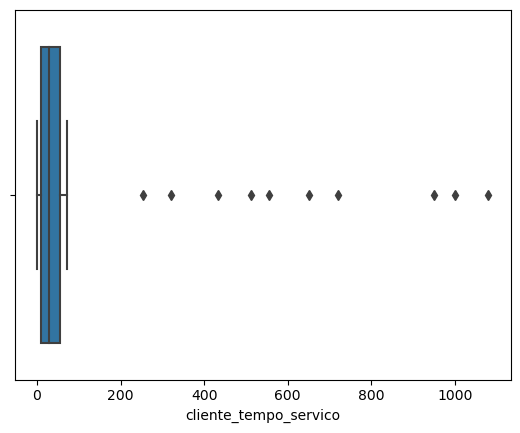

In [233]:
import seaborn as sns

sns.boxplot(x=dados_sem_vazios['cliente_tempo_servico'])

In [234]:
Q1 = dados_sem_vazios['cliente_tempo_servico'].quantile(.25)
Q3 = dados_sem_vazios['cliente_tempo_servico'].quantile(.75)
IQR = Q3-Q1
limite_inferior = Q1 - 1.5*IQR
limite_superior = Q3 + 1.5*IQR

In [235]:
outliers_index = (dados_sem_vazios['cliente_tempo_servico'] < limite_inferior) | (dados_sem_vazios['cliente_tempo_servico'] > limite_superior)

In [240]:
dados_sem_vazios[outliers_index]

,id_cliente,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
1952,2830-LEWOA,nao,masculino,0,sim,sim,1080.0,sim,nao,fibra otica,...,sim,sim,sim,sim,sim,um ano,nao,cartao de credito (automatico),103.90,112212.0
1953,2831-EBWRN,nao,masculino,0,nao,nao,1000.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,45.90,45900.0
1959,2834-SPCJV,sim,masculino,0,sim,nao,950.0,sim,nao,fibra otica,...,nao,nao,nao,sim,nao,mes a mes,nao,cheque eletronico,84.10,79895.0
1963,2842-JTCCU,sim,masculino,0,nao,nao,254.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,mes a mes,nao,transferencia bancaria (automatica),46.05,80.35
1965,2845-AFFTX,sim,masculino,1,sim,nao,321.0,sim,sim,fibra otica,...,nao,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,99.80,4259.3
1970,2851-STERV,nao,masculino,1,nao,nao,650.0,sim,nao,DSL,...,nao,sim,sim,sim,sim,um ano,sim,cheque eletronico,73.00,47450.0
1973,2856-NNASM,sim,masculino,1,nao,nao,721.0,sim,nao,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cheque pelo correio,89.55,3856.75
1977,2862-JVEOY,nao,masculino,0,nao,nao,555.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cheque pelo correio,19.15,124.4
1980,2865-TCHJW,sim,feminino,1,nao,nao,433.0,sim,sim,fibra otica,...,nao,sim,nao,sim,nao,mes a mes,sim,cheque eletronico,89.20,346.2
1981,2866-IKBTM,nao,feminino,0,nao,nao,512.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,mes a mes,nao,cheque pelo correio,19.55,19.55


In [241]:
dados_sem_vazios[outliers_index]['cliente_tempo_servico']

1952    1080.0
1953    1000.0
1959     950.0
1963     254.0
1965     321.0
1970     650.0
1973     721.0
1977     555.0
1980     433.0
1981     512.0
Name: cliente_tempo_servico, dtype: float64

In [242]:
dados_sem_out = dados_sem_vazios.copy()

In [243]:
dados_sem_out

,id_cliente,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,<NA>
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.9
7039,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.7
7040,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7041,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


In [244]:
dados_sem_out.loc[outliers_index, 'cliente_tempo_servico'] = np.ceil(
    dados_sem_out.loc[outliers_index, 'conta_cobranca_Total']/
    dados_sem_out.loc[outliers_index, 'conta_cobranca_mensal']
)

<Axes: xlabel='cliente.tempo_servico'>

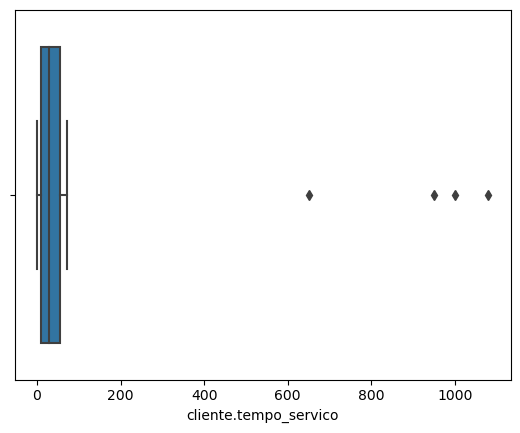

In [ ]:
sns.boxplot(x=dados_sem_out['cliente.tempo_servico'])

In [245]:
dados_sem_vazios[outliers_index][['cliente_tempo_servico','conta_cobranca_mensal','conta_cobranca_Total']]

,cliente_tempo_servico,conta_cobranca_mensal,conta_cobranca_Total
1952,1080.0,103.90,112212.0
1953,1000.0,45.90,45900.0
1959,950.0,84.10,79895.0
1963,254.0,46.05,80.35
1965,321.0,99.80,4259.3
1970,650.0,73.00,47450.0
1973,721.0,89.55,3856.75
1977,555.0,19.15,124.4
1980,433.0,89.20,346.2
1981,512.0,19.55,19.55


In [246]:
Q1 = dados_sem_out['cliente_tempo_servico'].quantile(.25)
Q3 = dados_sem_out['cliente_tempo_servico'].quantile(.75)
IQR = Q3-Q1
limite_inferior = Q1 - 1.5*IQR
limite_superior = Q3 + 1.5*IQR

outliers_index = (dados_sem_out['cliente_tempo_servico'] < limite_inferior) | (dados_sem_out['cliente_tempo_servico'] > limite_superior)
outliers_index

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: cliente_tempo_servico, Length: 7043, dtype: bool

In [247]:
dados_sem_out[outliers_index]

,id_cliente,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
1952,2830-LEWOA,nao,masculino,0,sim,sim,1080.0,sim,nao,fibra otica,...,sim,sim,sim,sim,sim,um ano,nao,cartao de credito (automatico),103.9,112212.0
1953,2831-EBWRN,nao,masculino,0,nao,nao,1000.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,45.9,45900.0
1959,2834-SPCJV,sim,masculino,0,sim,nao,951.0,sim,nao,fibra otica,...,nao,nao,nao,sim,nao,mes a mes,nao,cheque eletronico,84.1,79895.0
1970,2851-STERV,nao,masculino,1,nao,nao,650.0,sim,nao,DSL,...,nao,sim,sim,sim,sim,um ano,sim,cheque eletronico,73.0,47450.0


In [248]:
dados_sem_out = dados_sem_out[~outliers_index]
dados_sem_out

,id_cliente,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,<NA>
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.9
7039,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.7
7040,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7041,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


<Axes: xlabel='cliente_tempo_servico'>

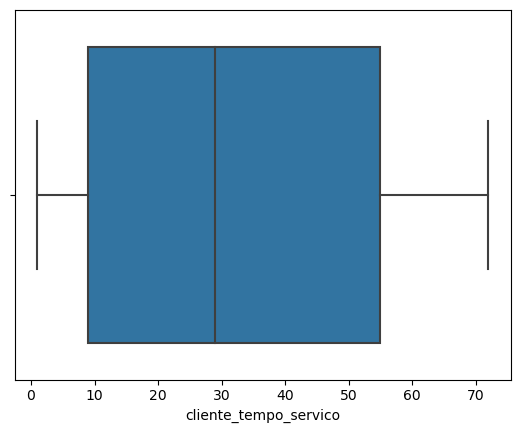

In [249]:
sns.boxplot(x=dados_sem_out['cliente_tempo_servico'])

In [250]:
dados_sem_out.reset_index(drop=True, inplace=True)

In [251]:
dados_sem_id = dados_sem_out.drop('id_cliente', axis=1).copy()
dados_sem_id

,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,internet_seguranca_online,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
0,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,nao,sim,nao,sim,sim,nao,None,None,None,NaN,<NA>
1,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.4
2,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7034,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,sim,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.9
7035,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,nao,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.7
7036,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,nao,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7037,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,sim,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


In [252]:
mapeamento = {
    'não':0,
    'nao':0,
    'sim':1,
    'masculino':0,
    'feminino':1
}

In [253]:
for col in dados_sem_id.columns:
    print(f'Coluna: {col}')
    print(dados_sem_id[col].unique())
    print('-'*30)

Coluna: Churn
['nao' 'sim']
------------------------------
Coluna: cliente_genero
['feminino' 'masculino']
------------------------------
Coluna: cliente_idoso
[0 1]
------------------------------
Coluna: cliente_parceiro
['sim' 'nao']
------------------------------
Coluna: cliente_dependentes
['sim' 'nao']
------------------------------
Coluna: cliente_tempo_servico
[ 9.  4. 13.  3. 71. 63.  7. 66. 54. 72.  5. 56. 34.  1. 45. 50. 23. 55.
 26. 69. 37. 49. 67. 20. 43. 59. 12. 27.  2. 25. 29. 14. 35. 64. 39. 40.
 11.  6. 30. 70. 57. 58. 16. 32. 33. 10. 21. 61. 15. 44. 22. 24. 19. 47.
 62. 46. 52.  8. 60. 48. 28. 41. 53. 68. 31. 36. 17. 18. 65. 51. 38. 42.]
------------------------------
Coluna: telefone_servico_telefone
['sim' 'nao']
------------------------------
Coluna: telefone_varias_linhas
['nao' 'sim' 'sem servico de telefone']
------------------------------
Coluna: internet_servico_internet
['DSL' 'fibra otica' 'nao']
------------------------------
Coluna: internet_seguranca_onlin

In [254]:
colunas = ['telefone_servico_telefone', 'Churn', 'cliente_parceiro', 'cliente_dependentes', 'conta_faturamente_eletronico', 'cliente_genero']

In [255]:
dados_sem_id[colunas] = dados_sem_id[colunas].replace(mapeamento)
dados_sem_id

,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,internet_seguranca_online,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
0,0,1,0,1,1,9.0,1,nao,DSL,nao,sim,nao,sim,sim,nao,None,NaN,None,NaN,<NA>
1,0,0,0,0,0,9.0,1,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,0.0,cheque pelo correio,59.90,542.4
2,1,0,0,0,0,4.0,1,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,1.0,cheque eletronico,73.90,280.85
3,1,0,1,1,0,13.0,1,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,1.0,cheque eletronico,98.00,1237.85
4,1,1,1,1,0,3.0,1,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,1.0,cheque pelo correio,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7034,0,1,0,0,0,13.0,1,nao,DSL,sim,nao,nao,sim,nao,nao,um ano,0.0,cheque pelo correio,55.15,742.9
7035,1,0,0,1,0,22.0,1,sim,fibra otica,nao,nao,nao,nao,nao,sim,mes a mes,1.0,cheque eletronico,85.10,1873.7
7036,0,0,0,0,0,2.0,1,nao,DSL,nao,sim,nao,nao,nao,nao,mes a mes,1.0,cheque pelo correio,50.30,92.75
7037,0,0,0,1,1,67.0,1,nao,DSL,sim,nao,sim,sim,nao,sim,dois anos,0.0,cheque pelo correio,67.85,4627.65


In [256]:
for col in dados_sem_id.columns:
    print(f"Coluna: {col}")
    print(dados_sem_id[col].unique())
    print("-" * 30)

Coluna: Churn
[0 1]
------------------------------
Coluna: cliente_genero
[1 0]
------------------------------
Coluna: cliente_idoso
[0 1]
------------------------------
Coluna: cliente_parceiro
[1 0]
------------------------------
Coluna: cliente_dependentes
[1 0]
------------------------------
Coluna: cliente_tempo_servico
[ 9.  4. 13.  3. 71. 63.  7. 66. 54. 72.  5. 56. 34.  1. 45. 50. 23. 55.
 26. 69. 37. 49. 67. 20. 43. 59. 12. 27.  2. 25. 29. 14. 35. 64. 39. 40.
 11.  6. 30. 70. 57. 58. 16. 32. 33. 10. 21. 61. 15. 44. 22. 24. 19. 47.
 62. 46. 52.  8. 60. 48. 28. 41. 53. 68. 31. 36. 17. 18. 65. 51. 38. 42.]
------------------------------
Coluna: telefone_servico_telefone
[1 0]
------------------------------
Coluna: telefone_varias_linhas
['nao' 'sim' 'sem servico de telefone']
------------------------------
Coluna: internet_servico_internet
['DSL' 'fibra otica' 'nao']
------------------------------
Coluna: internet_seguranca_online
['nao' 'sim' 'sem servico de internet']
---------

In [257]:
dados_sem_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7039 entries, 0 to 7038
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Churn                          7039 non-null   int64  
 1   cliente_genero                 7039 non-null   int64  
 2   cliente_idoso                  7039 non-null   int64  
 3   cliente_parceiro               7039 non-null   int64  
 4   cliente_dependentes            7039 non-null   int64  
 5   cliente_tempo_servico          7039 non-null   float64
 6   telefone_servico_telefone      7039 non-null   int64  
 7   telefone_varias_linhas         7039 non-null   object 
 8   internet_servico_internet      7039 non-null   object 
 9   internet_seguranca_online      7039 non-null   object 
 10  internet_backup_online         7039 non-null   object 
 11  internet_protecao_dispositivo  7039 non-null   object 
 12  internet_suporte_tecnico       7039 non-null   o

In [258]:
pd.get_dummies(dados_sem_id, drop_first = True)

,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,conta_faturamente_eletronico,conta_cobranca_mensal,conta_cobranca_Total,...,internet_suporte_tecnico_sim,internet_tv_streaming_sem servico de internet,internet_tv_streaming_sim,internet_filmes_streaming_sem servico de internet,internet_filmes_streaming_sim,conta_contrato_mes a mes,conta_contrato_um ano,conta_metodo_pagamento_cheque eletronico,conta_metodo_pagamento_cheque pelo correio,conta_metodo_pagamento_transferencia bancaria (automatica)
0,0,1,0,1,1,9.0,1,NaN,NaN,<NA>,...,1,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,9.0,1,0.0,59.90,542.4,...,0,0,0,0,1,1,0,0,1,0
2,1,0,0,0,0,4.0,1,1.0,73.90,280.85,...,0,0,0,0,0,1,0,1,0,0
3,1,0,1,1,0,13.0,1,1.0,98.00,1237.85,...,0,0,1,0,1,1,0,1,0,0
4,1,1,1,1,0,3.0,1,1.0,83.90,267.4,...,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7034,0,1,0,0,0,13.0,1,0.0,55.15,742.9,...,1,0,0,0,0,0,1,0,1,0
7035,1,0,0,1,0,22.0,1,1.0,85.10,1873.7,...,0,0,0,0,1,1,0,1,0,0
7036,0,0,0,0,0,2.0,1,1.0,50.30,92.75,...,0,0,0,0,0,1,0,0,1,0
7037,0,0,0,1,1,67.0,1,0.0,67.85,4627.65,...,1,0,0,0,1,0,0,0,1,0


In [259]:
dados_dummies = pd.get_dummies(dados_sem_id, drop_first = True, sparse='_')
dados_dummies

,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,conta_faturamente_eletronico,conta_cobranca_mensal,conta_cobranca_Total,...,internet_suporte_tecnico_sim,internet_tv_streaming_sem servico de internet,internet_tv_streaming_sim,internet_filmes_streaming_sem servico de internet,internet_filmes_streaming_sim,conta_contrato_mes a mes,conta_contrato_um ano,conta_metodo_pagamento_cheque eletronico,conta_metodo_pagamento_cheque pelo correio,conta_metodo_pagamento_transferencia bancaria (automatica)
0,0,1,0,1,1,9.0,1,NaN,NaN,<NA>,...,1,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,9.0,1,0.0,59.90,542.4,...,0,0,0,0,1,1,0,0,1,0
2,1,0,0,0,0,4.0,1,1.0,73.90,280.85,...,0,0,0,0,0,1,0,1,0,0
3,1,0,1,1,0,13.0,1,1.0,98.00,1237.85,...,0,0,1,0,1,1,0,1,0,0
4,1,1,1,1,0,3.0,1,1.0,83.90,267.4,...,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7034,0,1,0,0,0,13.0,1,0.0,55.15,742.9,...,1,0,0,0,0,0,1,0,1,0
7035,1,0,0,1,0,22.0,1,1.0,85.10,1873.7,...,0,0,0,0,1,1,0,1,0,0
7036,0,0,0,0,0,2.0,1,1.0,50.30,92.75,...,0,0,0,0,0,1,0,0,1,0
7037,0,0,0,1,1,67.0,1,0.0,67.85,4627.65,...,1,0,0,0,1,0,0,0,1,0


In [260]:
dados_dummies.columns

Index(['Churn', 'cliente_genero', 'cliente_idoso', 'cliente_parceiro',
       'cliente_dependentes', 'cliente_tempo_servico',
       'telefone_servico_telefone', 'conta_faturamente_eletronico',
       'conta_cobranca_mensal', 'conta_cobranca_Total',
       'telefone_varias_linhas_sem servico de telefone',
       'telefone_varias_linhas_sim', 'internet_servico_internet_fibra otica',
       'internet_servico_internet_nao',
       'internet_seguranca_online_sem servico de internet',
       'internet_seguranca_online_sim',
       'internet_backup_online_sem servico de internet',
       'internet_backup_online_sim',
       'internet_protecao_dispositivo_sem servico de internet',
       'internet_protecao_dispositivo_sim',
       'internet_suporte_tecnico_sem servico de internet',
       'internet_suporte_tecnico_sim',
       'internet_tv_streaming_sem servico de internet',
       'internet_tv_streaming_sim',
       'internet_filmes_streaming_sem servico de internet',
       'internet_filmes

In [261]:
dados_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7039 entries, 0 to 7038
Data columns (total 31 columns):
 #   Column                                                      Non-Null Count  Dtype           
---  ------                                                      --------------  -----           
 0   Churn                                                       7039 non-null   int64           
 1   cliente_genero                                              7039 non-null   int64           
 2   cliente_idoso                                               7039 non-null   int64           
 3   cliente_parceiro                                            7039 non-null   int64           
 4   cliente_dependentes                                         7039 non-null   int64           
 5   cliente_tempo_servico                                       7039 non-null   float64         
 6   telefone_servico_telefone                                   7039 non-null   int64           
 7   conta_

In [262]:
dados_dummies.isna().sum()

Churn                                                          0
cliente_genero                                                 0
cliente_idoso                                                  0
cliente_parceiro                                               0
cliente_dependentes                                            0
cliente_tempo_servico                                          0
telefone_servico_telefone                                      0
conta_faturamente_eletronico                                  17
conta_cobranca_mensal                                         17
conta_cobranca_Total                                          15
telefone_varias_linhas_sem servico de telefone                 0
telefone_varias_linhas_sim                                     0
internet_servico_internet_fibra otica                          0
internet_servico_internet_nao                                  0
internet_seguranca_online_sem servico de internet              0
internet_seguranca_online

In [263]:
dados_dummies.fillna(0, inplace=True)